    Since its emergence in late 2019, COVID-19 has rapidly spread across the globe, affecting millions of lives and disrupting economies, healthcare systems, and daily routines. This Covid dataset includes key metrics such as the total number of COVID-19 cases, total deaths, total recoveries, active cases, and the population of different countries. This analysis aims to provide insights into the global trends, patterns, and variations in the spread of the virus.

In [1]:
!pip install countryinfo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from countryinfo import CountryInfo
from wordcloud import WordCloud

In [3]:
# importing dataset
df = pd.read_csv('/kaggle/input/covid-cases-and-deaths-worldwide/covid_worldwide.csv')
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [4]:
df.shape

(231, 8)

In [5]:
### Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


# Data Cleaning:




### Drop the Serial Number column:

In [6]:
df.drop('Serial Number', axis=1, inplace=True)

### Identifying Missing Values:

In [7]:
df.isnull().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

Total Deaths, Total Recovered, Active Cases, Total Test, and Population columns have missing data. First check Population column.

In [8]:
df[df['Population'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,China,"503,302","5,272","379,053","118,977","160,000,000",NaN
226,Diamond Princess,712,13,699,0,NaN,NaN
229,MS Zaandam,9,2,7,0,NaN,NaN


China 2020 population is estimated at 1,439,323,776 people at mid year according to UN data (Worldometer)and fill China population with this value. Diamond Princess and MS Zaandam are two ships and will drop these two rows.

In [9]:
df[df['Total Recovered'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,Turkey,"17,042,722","101,492",NaN,NaN,"162,743,369","85,561,976"
65,Tunisia,"1,150,356","29,308",NaN,NaN,"4,997,373","12,046,656"
77,Paraguay,"806,256","19,820",NaN,NaN,"2,657,506","7,305,843"
94,Honduras,"470,757","11,104",NaN,NaN,"1,619,676","10,221,247"
111,Martinique,"229,687","1,097",NaN,NaN,"828,928","374,087"
112,Laos,"217,973",758,NaN,NaN,"1,233,207","7,481,023"
113,Iceland,"208,688",229,NaN,NaN,"1,996,384","345,393"
117,Guadeloupe,"201,394","1,007",NaN,NaN,"938,039","399,794"
136,Suriname,"82,020","1,398",NaN,NaN,"239,603","596,831"
138,French Polynesia,"77,957",649,NaN,NaN,NaN,"284,164"


In [10]:
df[df['Total Test'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
29,DPRK,"4,772,813",74,"4,772,739",0,NaN,"25,990,679"
138,French Polynesia,"77,957",649,NaN,NaN,NaN,"284,164"
150,Seychelles,"50,665",172,"50,440",53,NaN,"99,426"
156,Tanzania,"42,664",846,NaN,NaN,NaN,"63,298,550"
172,Solomon Islands,"24,575",153,NaN,NaN,NaN,"721,159"
181,Nicaragua,"18,491",225,"4,225","14,041",NaN,"6,779,100"
183,Tajikistan,"17,786",125,"17,264",397,NaN,"9,957,464"
190,Marshall Islands,"15,584",17,"15,528",39,NaN,"60,057"
203,Comoros,"8,992",161,"8,827",4,NaN,"907,419"
215,Kiribati,"5,008",18,"2,703","2,287",NaN,"123,419"


Due to the presence of missing values in multiple columns for these countries, I decide to  eliminate the rows corresponding to these countries.

In [11]:
# Filling China Population
df.loc[df['Country']=='China', 'Population'] = '1439323776'
# Drop other rows
df.dropna(axis = 0, inplace = True)

In [12]:
df.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

### Converting object type data to float:
Total Cases, Total Deaths, Total Recovered, Active Cases, Total Test, and Population are object types. It is necessary to convert the object type data to integer. This conversion can be achieved by removing any non-numeric characters (e.g., commas) and then converting the data type to int64.


In [13]:
df['Total Cases'] = df['Total Cases'].str.replace(',','').astype('int64')
df['Total Deaths'] = df['Total Deaths'].str.replace(',','').astype('int64')
df['Total Recovered'] = df['Total Recovered'].str.replace(',','').astype('int64')
df['Active Cases'] = df['Active Cases'].str.replace(',','').astype('int64')
df['Total Test'] = df['Total Test'].str.replace(',','').astype('int64')
df['Population'] = df['Population'].str.replace(',','').astype('int64')

In [14]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,3.314840e+06,3.364156e+04,3.182882e+06,9.831612e+04,3.439885e+07,3.925355e+07
std,1.017086e+07,1.122568e+05,9.823182e+06,7.967627e+05,1.220589e+08,1.487879e+08
min,1.403000e+03,1.000000e+00,4.380000e+02,0.000000e+00,7.850000e+03,4.965000e+03
25%,3.805275e+04,3.135000e+02,3.553275e+04,8.000000e+01,4.013330e+05,1.142637e+06
50%,3.134920e+05,3.159500e+03,3.074625e+05,1.286000e+03,2.653964e+06,6.942671e+06
75%,1.711939e+06,1.685250e+04,1.696639e+06,1.112950e+04,1.538628e+07,2.822818e+07
max,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.439324e+09


### Creating Continent name

In [15]:
def get_continent(country_name):
    try:
        country = CountryInfo(country_name)
        continent = country.region()
        return continent
    except:
        return np.nan

df['Continent'] = df['Country'].apply(get_continent)

In [16]:
df['Continent'].isnull().sum()

24

In [17]:
country_to_continent = {
    'S. Korea': 'Asia',
    'Czechia': 'Europe',
    'Myanmar': 'Asia',
    'Palestine': 'Asia',
    'North Macedonia': 'Europe',
    'Montenegro': 'Europe',
    'Channel Islands': 'Europe',
    'Eswatini': 'Africa',
    'Cabo Verde': 'Africa',
    'Andorra': 'Europe',
    'Curaçao': 'Americas',
    'Bahamas': 'Americas',
    'Congo': 'Africa',
    'Timor-Leste': 'Asia',
    'CAR': 'Africa',
    'Gambia': 'Africa',
    'Saint Martin': 'Americas',
    'Caribbean Netherlands': 'Americas',
    'Sint Maarten': 'Americas',
    'St. Vincent Grenadines': 'Americas',
    'Turks and Caicos': 'Americas',
    'Sao Tome and Principe': 'Africa',
    'Macao': 'Asia',
    'Saint Pierre Miquelon': 'Americas'
}

df['Continent']= df['Continent'].fillna(df['Country'].map(country_to_continent))


In [18]:
df.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
Continent          0
dtype: int64

### Important functions

In [19]:
def get_top_countries_by_column(df, column_name, n=5):
    """
    Returns the top 'n' countries and corresponding with the highest values for column_name.

    """
    temp = df[['Country', column_name]].sort_values(by= column_name, 
                                ascending= False).reset_index().head(n)
    temp['Position']= temp.index + 1
    temp= temp[['Position','Country', column_name]]
    print("Top "+str(n) +" countries with the highest number of active COVID-19 cases:")
    fig = plt.figure(figsize=(9,5))
    ax = plt.subplot(121)
    ax.axis('off')
    bbox =[0.2,0.2,1,1]
    ax.table(cellText = temp.values,  colLabels=temp.columns,bbox=bbox)
#     display(temp)
    


def plot_barh(df, column_name, n=10):
    
    temp = df[['Country', column_name]].sort_values(by= column_name, ascending= False).head(n)
    # Create a horizontal bar chart using Plotly Express
    fig = px.bar(temp, y='Country', 
                 x=column_name, orientation='h', 
                 color='Country',
                 text = column_name)

    # Customize the layout of the chart
    fig.update_layout(
                title='COVID-19 ' + column_name +' by Country',
                xaxis_title=column_name,
                yaxis_title='Country',
                height=600,width=800,
                showlegend=False
      )
    fig.show()

### 1. How many different countries had the virus? 

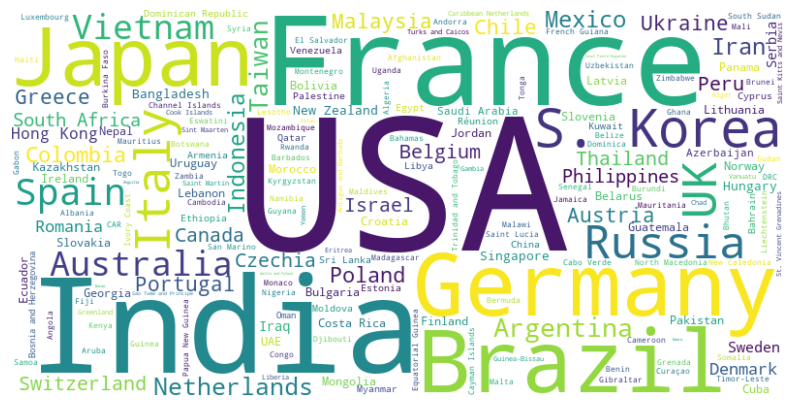

In [20]:
country_cases = df.groupby('Country')['Total Cases'].sum().reset_index()

wordcloud = WordCloud(width=800, height=400, background_color='white')
# Set the size of each country name in the word cloud based on the COVID-19 cases
wordcloud.generate_from_frequencies({row['Country']: row['Total Cases'] 
                                     for _, row in country_cases.iterrows()})

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Get the number of different countries
num_countries = len(country_cases)

print("Number of different countries with the virus:", num_countries)

Number of different countries with the virus: 196


### 2. What are the countries with the highest total number of COVID-19 cases?

In [22]:
plot_barh(df, 'Total Cases')

Based on the dataset, the United States has recorded the highest number of COVID-19 cases, with a total of 104,196,861 cases.. India follows in second place with 44.7 million cases. France, Germany, and Brazil also feature among the countries with the highest COVID-19 case counts.

In [23]:
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='Total Cases', hover_name='Country',
                    title='COVID-19 Total Cases by Country',
                    color_continuous_scale='Viridis_r',
                    labels={'Total Deaths'})
fig.show()

### 3. Which countries have the highest number of COVID-19 deaths?

In [24]:
plot_barh(df, 'Total Deaths')

According to the dataset, the United States has reported the highest number of COVID-19 deaths, tragically reaching 1,132,935 fatalities. Brazil ranks as the country with the second-highest number of COVID-19 deaths, with a significant toll of 697,074 lives lost. India follows closely behind with 530,740 reported deaths, while Russia has recorded 395,108 deaths, and Mexico has reported 332,198 deaths related to COVID-19.

In [25]:
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='Total Deaths', hover_name='Country',
                    title='COVID-19 Total Deaths by Country',
                    color_continuous_scale='Viridis_r',
                    labels={'Total Deaths'})
fig.show()

### 4. What are the top 5 countries in active cases?

Top 5 countries with the highest number of active COVID-19 cases:


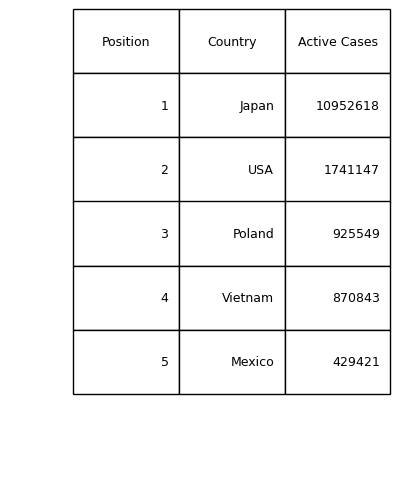

In [26]:
get_top_countries_by_column(df, 'Active Cases')

In [27]:
plot_barh(df, 'Active Cases', 5)

### 5. What are the top 5 countries in total recoveries?

Top 5 countries with the highest number of active COVID-19 cases:


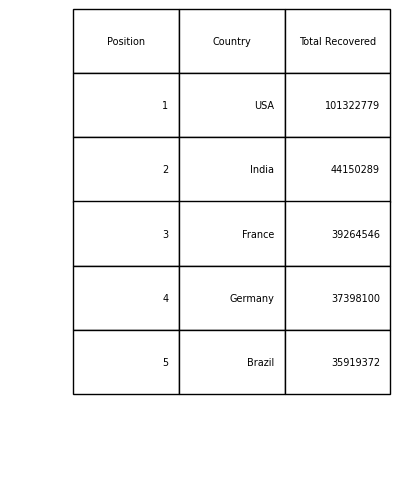

In [28]:
get_top_countries_by_column(df,'Total Recovered')

In [29]:
plot_barh(df, 'Total Recovered',5)

### 6. What is the recovery rate for different countries?

Top 3 countries with the highest number of active COVID-19 cases:


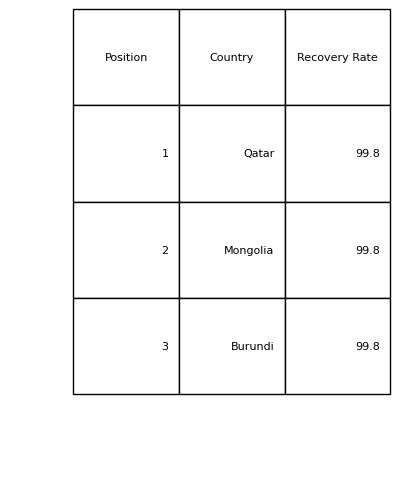

In [30]:
df['Recovery Rate'] = np.round((df['Total Recovered'] / df['Total Cases']) * 100,1)
get_top_countries_by_column(df, 'Recovery Rate',3)

### 7. How does the number of COVID-19 cases correlate with the population size?

In [31]:
correlation = df['Total Cases'].corr(df['Population'])
print("Correlation coefficient between COVID-19 cases and population size:", correlation)

Correlation coefficient between COVID-19 cases and population size: 0.371499947263442


The correlation coefficient between COVID-19 cases and population size of 0.371499947263442 indicates a positive but moderate correlation.That means, as the population size increases, the number of COVID-19 cases tends to increase as well, it does not indicate that population size directly proportional to higher COVID-19 cases.

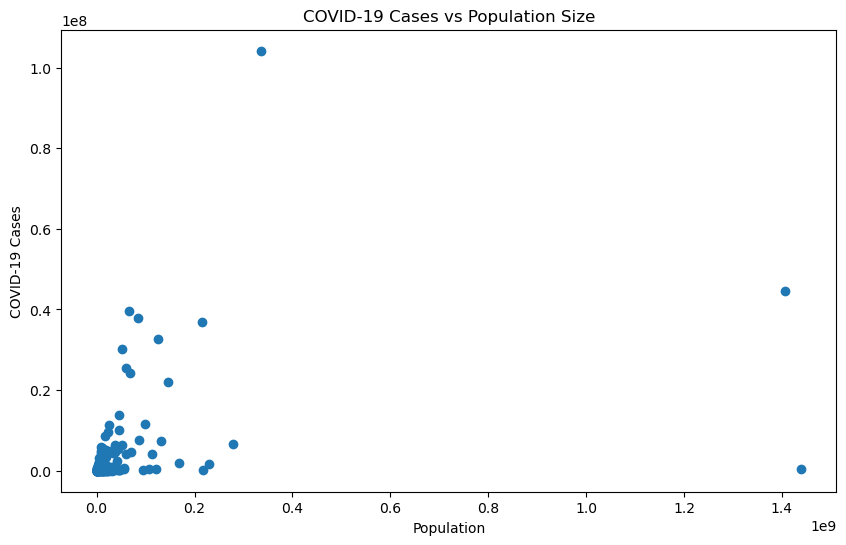

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Total Cases'])
plt.xlabel('Population')
plt.ylabel('COVID-19 Cases')
plt.title('COVID-19 Cases vs Population Size')
plt.show()

In [33]:
fig = px.scatter(df, x='Population', y='Total Cases', hover_name='Country',
                 title='COVID-19 Impact vs. Population Size',
                 labels={'Population': 'Population', 'Total Cases': 'Total Cases'})
fig.show()

### Are there any correlations between COVID-19 cases/deaths and population?

<Axes: >

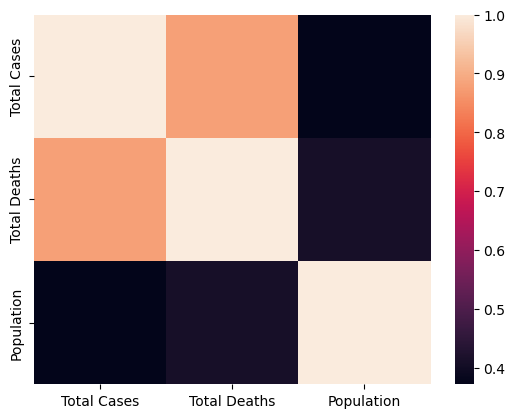

In [34]:
correlation_matrix = df[['Total Cases', 'Total Deaths', 'Population']].corr()
sns.heatmap(correlation_matrix)

### 8. Are there any countries with a high number of cases but a low number of deaths?

In [35]:
high_cases_threshold = 100000
low_deaths_threshold = 500
high_cases_low_deaths = df[(df['Total Cases'] > high_cases_threshold) & (df['Total Deaths'] < low_deaths_threshold)]
print("Countries with a high number of cases but a low number of deaths:")
display(high_cases_low_deaths[['Country', 'Total Cases', 'Total Deaths']])

Countries with a high number of cases but a low number of deaths:


,Country,Total Cases,Total Deaths
105,Brunei,275220,225
119,Maldives,185715,311
130,Channel Islands,101116,223


### 9. How do different regions or continents compare in terms of COVID-19 impact?


In [36]:
region_cases = df.groupby('Continent')['Total Cases'].sum().reset_index()

# Create a bar chart
fig = px.bar(region_cases, x='Continent', y='Total Cases',
             title='COVID-19 Impact by Continent',
             labels={'Region': 'Continent', 'Total Cases': 'Total Cases'})
fig.show()

Europe has the highest number of COVID-19 cases, closely followed by the Americas and Asia. In contrast, Africa and Oceania have significantly lower numbers of reported cases compared to the other three regions.

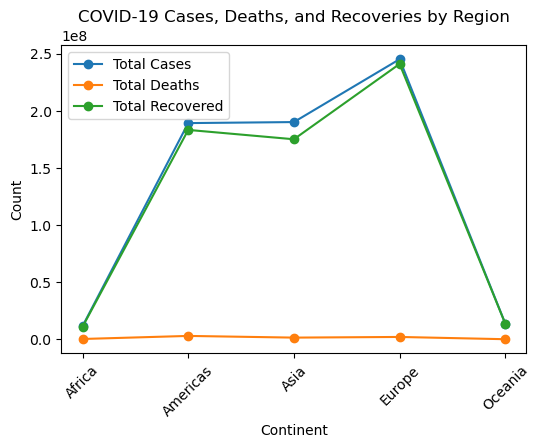

In [37]:
region_data = df.groupby('Continent').sum(numeric_only=True,).reset_index()

plt.figure(figsize=(6,4))
plt.plot(region_data['Continent'], region_data['Total Cases'],
         marker='o', label='Total Cases')
plt.plot(region_data['Continent'], region_data['Total Deaths'],
         marker='o', label='Total Deaths')
plt.plot(region_data['Continent'], region_data['Total Recovered'],
         marker='o', label='Total Recovered')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('COVID-19 Cases, Deaths, and Recoveries by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 10. What is the testing rate (tests per capita) for each country?

In [38]:
df['Testing Rate'] = df['Total Test'] / df['Population']
fig = px.histogram(df, x='Testing Rate', nbins=10)
fig.update_layout(xaxis_title='Testing Rate (Tests per Population)',
                  yaxis_title='Frequency',title='Distribution of Testing Rate')
fig.show()

In summary, the COVID-19 analysis  provides insights into the global impact of the pandemic. Key findings include:  the United States and India have the highest number of reported cases. Regarding COVID-19 deaths, the United States records the highest number of fatalities. Europe emerges as the region with the highest number of cases, closely followed by the Americas and Asia. Conversely, Africa and Oceania exhibit significantly lower case numbers.